# SQLAlchemy, Sqlite, and Dates

## Setup

In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [8]:
session = Session(engine)

## Analysis

Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [18]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(Dow.stock).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

[('AA'),
 ('AXP'),
 ('BA'),
 ('BAC'),
 ('CAT'),
 ('CSCO'),
 ('CVX'),
 ('DD'),
 ('DIS'),
 ('GE'),
 ('HD'),
 ('HPQ'),
 ('IBM'),
 ('INTC'),
 ('JNJ'),
 ('JPM'),
 ('KO'),
 ('KRFT'),
 ('MCD'),
 ('MMM'),
 ('MRK'),
 ('MSFT'),
 ('PFE'),
 ('PG'),
 ('T'),
 ('TRV'),
 ('UTX'),
 ('VZ'),
 ('WMT'),
 ('XOM')]

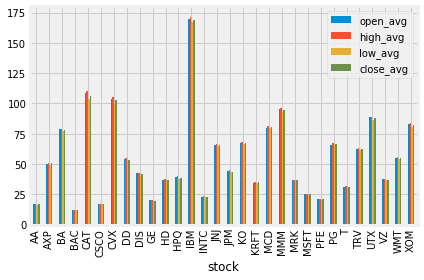

In [10]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
df.set_index('stock', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()


### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

In [33]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
import datetime as dt
import numpy as np

date = dt.datetime(2011, 1, 1)

results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == 'IBM').all()
    
ptps = list(np.ravel(results))

# List Comprehension Solution
# ptps = [result[0] for result in results]

ptps

[2.2200000000000273,
 4.0,
 7.400000000000006,
 9.019999999999982,
 5.519999999999982,
 3.069999999999993,
 2.319999999999993,
 5.22999999999999,
 4.900000000000006,
 8.870000000000005,
 10.269999999999982,
 5.670000000000016,
 3.299999999999983,
 1.5900000000000034,
 4.039999999999992,
 6.090000000000003,
 5.77000000000001,
 6.039999999999992,
 4.950000000000017,
 4.8799999999999955,
 2.6999999999999886,
 5.759999999999991,
 3.0900000000000034,
 3.579999999999984,
 3.219999999999999]

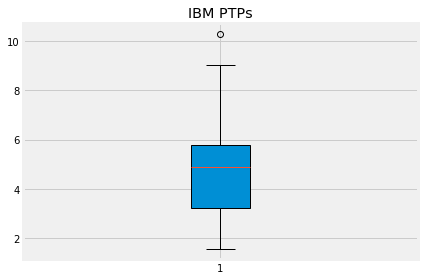

In [34]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
import numpy as np

fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('IBM PTPs')
fig.tight_layout()
plt.show()
